<a href="https://colab.research.google.com/github/cherlimSG/DL/blob/main/CNN_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN introductions#
This notebook is designed to get you familiar with preparing image data for deep learning using CNN. 

## Getting Used to Image Data 

### Image Visulization
- upload the trees.jpg to your Colab working directory if you are using Colab
- import matplotlib.pyplot as plt
- read in the tree image
- display it

--2021-12-08 10:59:34--  https://docs.google.com/uc?export=download&id=1-sg-gMUxcRC0BIoymce9NBRbpi3Po7s4
Resolving docs.google.com (docs.google.com)... 74.125.23.138, 74.125.23.139, 74.125.23.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.23.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ffuimtugkji3anjbrkjtc3uog5510otq/1638961125000/00138594504398630894/*/1-sg-gMUxcRC0BIoymce9NBRbpi3Po7s4?e=download [following]
--2021-12-08 10:59:34--  https://doc-0g-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ffuimtugkji3anjbrkjtc3uog5510otq/1638961125000/00138594504398630894/*/1-sg-gMUxcRC0BIoymce9NBRbpi3Po7s4?e=download
Resolving doc-0g-bo-docs.googleusercontent.com (doc-0g-bo-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0g-bo-docs.googleusercontent.com (doc-0g-bo-docs.

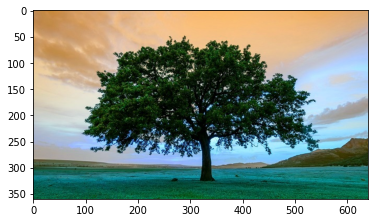

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt
import cv2

# Load the image from google drive

!wget --no-clobber --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-sg-gMUxcRC0BIoymce9NBRbpi3Po7s4' -O './trees.jpg'
image = cv2.imread('trees.jpg')

# Display the image
plt.imshow(image)
plt.show()

### Task 1: 
- Determine the image height, width and number of channel.
- Get the image data of each channel, i.e. red, green, blue channel respectively, and display it. 
- Crop the tree region of the RGB image using height from 50 to 300, width from 100 to 550, and display the cropped image. 
- Convert the cropped RGB image to grayscale using **rgb2gray** from **skimage**.

- 1.1 Determine the image height, width and number of channel.

In [ ]:
image.shape

(360, 640, 3)

- 1.2 Get the image data of each channel, i.e. red, green, blue channel respectively, and display it. 

In [ ]:
import numpy as np

In [ ]:
#r:0; g:1; b:2
b = image.copy()
# set green and red channels to 0
b[:, :, 0] = 0
b[:, :, 1] = 0


g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 1] = 0
r[:, :, 2] = 0

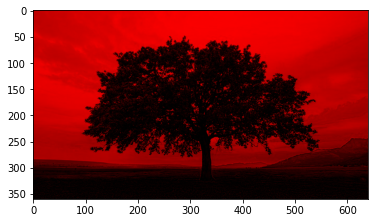

In [ ]:
plt.imshow(r)

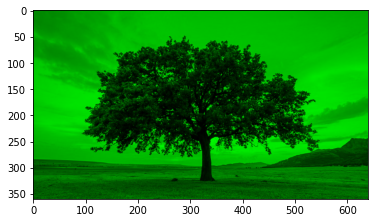

In [ ]:
plt.imshow(g)

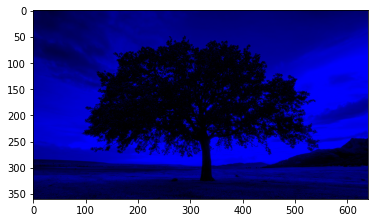

In [ ]:
plt.imshow(b)

- 1.3 Crop the tree region of the RGB image using height from 50 to 300, width from 100 to 550, and display the cropped image. (**Hint**: It is similar to slice array in numpy)

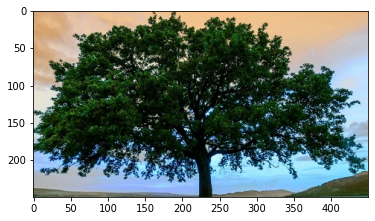

In [ ]:
# Cropping an image
cropped_image = image[50:300, 100:550]
 
# Display cropped image
plt.imshow(cropped_image)
plt.show()

- 1.4 Convert the cropped RGB image to grayscale using **rgb2gray** from **skimage**.
    - You may refer to document of rgb2gray online: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html). 
    - Installation information of scikit-image is availabe here https://scikit-image.org/docs/dev/install.html). 

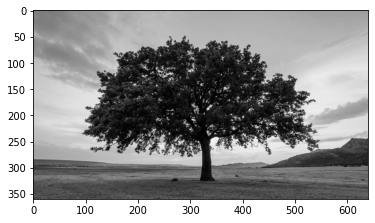

(360, 640)

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255
plt.imshow(gray, cmap='gray')
plt.show()
gray.shape

In [ ]:
gray

array([[0.50196078, 0.49803922, 0.49411765, ..., 0.61176471, 0.61176471,
        0.61176471],
       [0.50196078, 0.49803922, 0.49411765, ..., 0.61176471, 0.61176471,
        0.61176471],
       [0.50588235, 0.50196078, 0.49803922, ..., 0.61176471, 0.61176471,
        0.61568627],
       ...,
       [0.28235294, 0.31372549, 0.28627451, ..., 0.35294118, 0.29019608,
        0.29019608],
       [0.28235294, 0.2627451 , 0.23529412, ..., 0.34509804, 0.30196078,
        0.26666667],
       [0.26666667, 0.21568627, 0.30196078, ..., 0.38431373, 0.36078431,
        0.23137255]])

## Concept of Convolution

An example is given below to show how to implement a 1-D convolution by convolving the input 1-D array with the 1-D kernel. Do you think the kernel is good to detect edge? 

In [ ]:
# Example of 1-D convolution
import numpy as np
array = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for i in range(8):   
    conv[i] = (kernel * array[i:i+3]).sum() 
# Print conv
print(conv)

[ 0  0  1  0  0 -1  0  0  0  0]


### Task 2:
- Implement a 1-D convolution by changing the 1-D kernel to [1, 0, -1] in the example.
- Implement a 2-D convolution by applying a 2-D kernel [[0, 1, 0], [1, 1, 1], [0, 1, 0]] to the gray image obtained in Task 1.
- Define a kernel to detect horizontal lines. (Hint: we can use a kernel [[-1, 1, -1], [-1, 1, -1], [-1, 1, -1]] to detect vertical lines in images.) 

- 2.1 Implement a 1-D convolution by changing the 1-D kernel to [1, 0, -1] in the example.

In [ ]:
#Task 2.1
# Example of 1-D convolution
import numpy as np
array = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0])
kernel = np.array([1, 0,-1])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for i in range(8):   
    conv[i] = (kernel * array[i:i+3]).sum() 
# Print conv
print(conv)

[ 0  1  1  0 -1 -1  0  1  0  0]


- 2.2 Implement a 2-D convolution by applying a 2-D kernel [[0, 1, 0], [1, 1, 1], [0, 1, 0]] to the gray image obtained in Task 1. Think what kind of pattern can be detected by this kernel? 

In [ ]:
gray.shape

(360, 640)

The following kernels can be found in https://aishack.in/tutorials/image-convolution-examples/

In [ ]:
# Kernel provided by exercise
kernel = np.array((
    [0, 1, 0], 
    [1, 1, 1], 
    [0, 1, 0]), dtype="int")

In [ ]:
# vertical line kernel
kernel_v = np.array((
    [-1, 2, -1], 
    [-1, 2, -1], 
    [-1, 2, -1]), dtype="int")


In [ ]:
# horizontal line kernel
kernel_h = np.array((
    [-1, -1, -1], 
    [2, 2, 2], 
    [-1, -1, -1]), dtype="int")

In [ ]:
# construct the Sobel kernel to detect vertical changes
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

# construct the Sobel kernel to detect horizontal changes
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

In [ ]:
ht, wi = gray.shape

In [ ]:
kht, kwi = kernel.shape

In [ ]:
conv = np.zeros([ht,wi]) #conv = np.zeros([360,640])

###Define function convo to perform simple 2D convolution###

In [ ]:
def convo(image, kernel,ht,wi):
  for i in range(ht-2):  
    for j in range(wi-2):
      conv[i][j] = (kernel * gray[i:i+kht, j:j+kwi]).sum() 
  # Print conv
  return conv

### Using kernel provided###

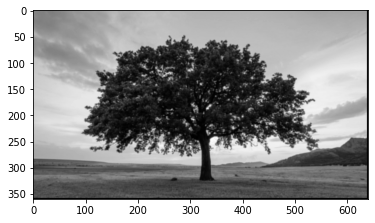

In [ ]:
convo(gray, kernel, ht, wi) #Original kernel for 2D convolution
plt.imshow(conv, cmap='gray')

- 2.3 Define a kernel to detect horizontal lines. (Hint: we can use a kernel [[-1, 1, -1], [-1, 1, -1], [-1, 1, -1]] to detect vertical lines in images.) 

###Vertical line detection###

The picture below shows indented vertical lines 

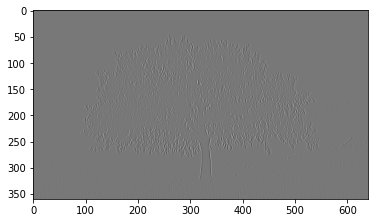

In [ ]:
convo(gray, kernel_v, ht, wi) #Kernel for vertical line detection
plt.imshow(conv, cmap='gray')

###Horizontal line detection###

Picture below shows indented horizontal lines


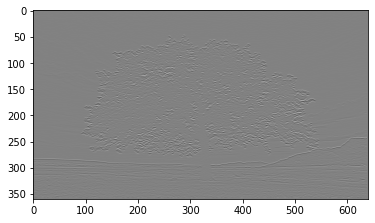

In [ ]:
convo(gray, kernel_h, ht, wi) #Kernel for horizontal line detection
plt.imshow(conv, cmap='gray')

You may find the output result looks similar to the input gray image as only one filter is applied. More abstract and complicated features can be extract when you apply deeper layers of filters. 

###Detect vertical changes###

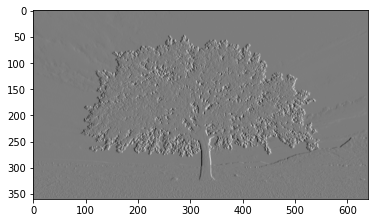

In [ ]:
convo(gray, sobelX, ht, wi) #Kernel for vertical changes
plt.imshow(conv, cmap='gray')

###Detect horizontal changes###

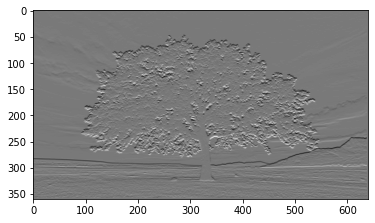

In [ ]:
convo(gray, sobelY, ht, wi) #Kernel for horizontal changes
plt.imshow(conv, cmap='gray')

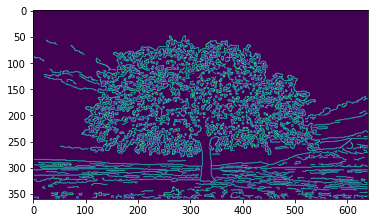

In [ ]:
from skimage import feature
edge = feature.canny(gray)
plt.imshow(edge)
plt.show()

##Experiments with OpenCV##

https://stackoverflow.com/questions/60521925/how-to-detect-the-horizontal-and-vertical-lines-of-a-table-and-eliminate-the-noi

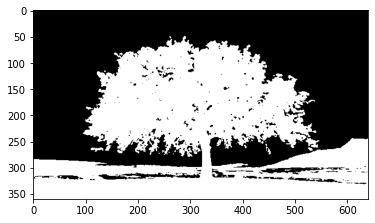

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('trees.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Detect horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
horizontal_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)

# Detect vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,50))
vertical_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=1)

# Combine masks and remove lines
table_mask = cv2.bitwise_or(horizontal_mask, vertical_mask)
image[np.where(table_mask==255)] = [255,255,255]

#cv2_imshow(thresh)
plt.imshow(thresh, cmap='gray')
plt.show()


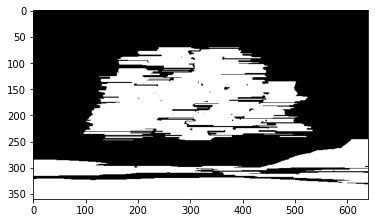

In [ ]:
plt.imshow(horizontal_mask, cmap='gray')
plt.show()

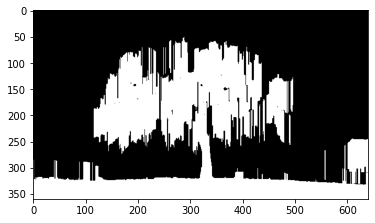

In [ ]:
plt.imshow(vertical_mask, cmap='gray')
plt.show()

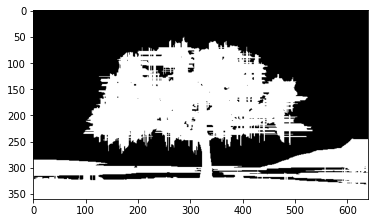

In [ ]:
plt.imshow(table_mask, cmap='gray')
plt.show()

## Object Classification Using CNN

Convolutional neural networks (CNN) for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (Dense) layers (for readout).

We will builc a basic CNN to work with the CIFAR-10 Dataset. This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck 

For details about CIFAR-10 see: https://www.cs.toronto.edu/~kriz/cifar.html

###  State-of-the-Art in Object Classification

For a compilation of published performance results on CIFAR 10, see: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

### Data Loading and Exploration

In [ ]:
from keras.datasets import cifar10

# Data loading
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


[2]


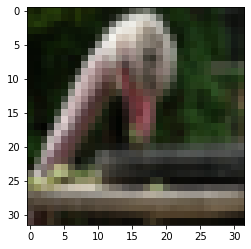

In [ ]:
## Let's look at one of the images
print(y_train[400]) 
plt.imshow(x_train[400])
plt.show()

As we have 10 classes in the image dataset, each image is labelled by an integer from 0 to 9. Label 2 means this image is classified as a bird class. To train a CNN model, we first need to apply **one-hot encoding of the labels**. 

In [ ]:
import tensorflow as tf

In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 2th position
y_train[400]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Keras Layers for CNNs

Previously we built Neural Networks using primarily the Dense layer. Here we will describe how to use some of the CNN-specific layers provided by Keras.

### Conv2D 
(https://keras.io/api/layers/convolution_layers/convolution2d/)

#### Format

keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)

#### Arguments:

- filters: the number of filter used per location. In other words, the depth of the output.
- kernel_size: an (x,y) tuple giving the height and width of the kernel to be used
- strides: and (x,y) tuple giving the stride in each dimension. Default is (1,1)
- input_shape: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
(https://keras.io/api/layers/pooling_layers/max_pooling2d/)

#### Format

keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

#### Argument

- pool_size: the (x,y) size of the grid to be pooled.
- strides: Assumed to be the pool_size unless otherwise specified

### Flatten
(https://keras.io/api/layers/reshaping_layers/flatten/)

Turns its input into a one-dimensional vector (per instance). Usually used when transitioning between convolutional layers and fully connected layers.

#### Format

keras.layers.Flatten(data_format=None, **kwargs)

## Build a CNN 

### Task 3: 

- Import the necessary components from Keras
- Initialize sequential model object. 
- We are going to build a CNN with a basic structure of 
    - **Convolution => Max pooling => Flatten => Dense**.  

- 3.1.1 Import Sequential from keras.models
- 3.1.2 Import Conv2D, Flatten, Dense, MaxPooling2D from keras.layers

In [ ]:
# put your codes here
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras import Sequential


- 3.2 Initialize sequential model object

In [ ]:
# put your codes here
model = Sequential()

- 3.3 Add a **Conv2D layer** to construct the input layer of the network. 
    - Number of filters: 10
    - Kernel size: 3 x 3
    - Input shape: 3-D input sensor (should be same as the shape of training images)
    - Activation function: Relu 

In [ ]:
# put your codes here
model.add(Conv2D(filters=10,
                 kernel_size=(3,3),
                 input_shape=(32, 32, 3),
                 activation='relu'))

- 3.4 Add a **Maxpooling layer** 
    - pool_size: 2 x 2

In [ ]:
# put your codes here
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

- 3.5 Add a **Flatten layer** to translate between the image processing and classification part of your network.

In [ ]:
# put your codes here
model.add(Flatten())

- 3.6 Add a **Dense layer** to classify the 10 different categories. What should be the activation function?

In [ ]:
# put your codes here
model.add(Dense(10, activation='softmax'))

Congratulations! You have built up your first CNN using Keras. Let's have a look of the parameters of the model. 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2250)              0         
                                                                 
 dense (Dense)               (None, 10)                22510     
                                                                 
Total params: 22,790
Trainable params: 22,790
Non-trainable params: 0
_________________________________________________________________


Please verify the number of parameters and the shape of the output of each layer. Do you get the correct answer? 

## Train a CNN

https://www.tensorflow.org/guide/keras/train_and_evaluate

### Task 4: 

Compile the model 
- 'adam' optimizer
- 'categorical_crossentropy' loss function
- 'accuracy' metrics

Fit the network on train_data and train_labels. 
- epochs: 10
- batch_size: 32
- validata_split: 20%


In [ ]:
# put your codes here
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
batch_size=32
history=model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=batch_size)

Epoch 1/10
1250/1250 [==============================] - 20s 16ms/step - loss: 4.5841 - accuracy: 0.1645 - val_loss: 2.2088 - val_accuracy: 0.1823
Epoch 2/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.1617 - accuracy: 0.2063 - val_loss: 2.1296 - val_accuracy: 0.2264
Epoch 3/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.0689 - accuracy: 0.2399 - val_loss: 2.0693 - val_accuracy: 0.2384
Epoch 4/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.0071 - accuracy: 0.2628 - val_loss: 2.0436 - val_accuracy: 0.2630
Epoch 5/10
1250/1250 [==============================] - 19s 15ms/step - loss: 1.9598 - accuracy: 0.2849 - val_loss: 2.0581 - val_accuracy: 0.2837
Epoch 6/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.8693 - accuracy: 0.3256 - val_loss: 1.9767 - val_accuracy: 0.2969
Epoch 7/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.8020 - accuracy: 0.3541 - val_loss: 1.9254 -

## Evaluate a CNN

https://www.tensorflow.org/guide/keras/train_and_evaluate

### Task 5: 
- Plot the training loss and validation loss
- Evaluate the data on a separate test set: test_data and test_labels.
- Use the same batch size that was used for fitting.

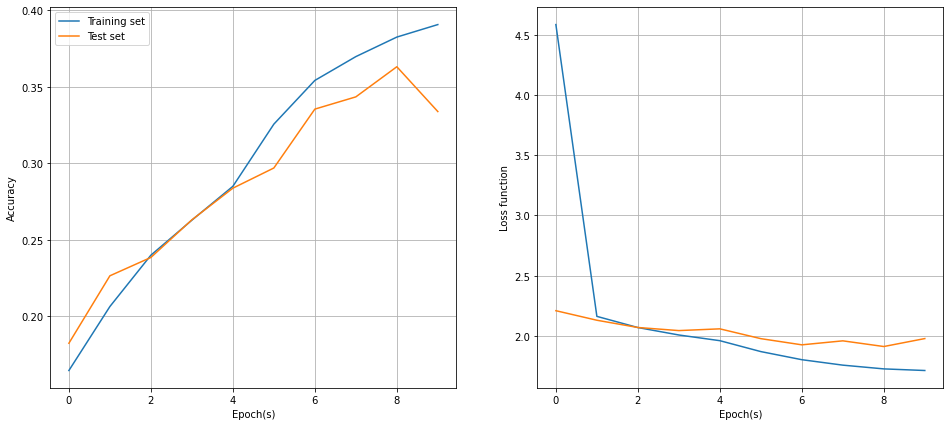

In [ ]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = "Training set")
plt.plot(history.history['val_accuracy'], label = "Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history.history['loss'], label = "Training set")
plt.plot(history.history['val_loss'], label = "Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

In [ ]:
results = model.evaluate(x_test, y_test, batch_size = batch_size)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 7ms/step - loss: 1.9888 - accuracy: 0.3357
test loss, test acc: [1.9887986183166504, 0.33570000529289246]


In [ ]:
#Save history to an external file
np.save('history.npy',history.history)
#To load a history file
#history=np.load('history.npy',allow_pickle='TRUE').item()

## Regularization  of CNN

### Dropout

https://keras.io/api/layers/regularization_layers/dropout/

Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training.

#### Format

keras.layers.Dropout(rate, noise_shape=None, seed=None, **kwargs)

#### Arguments

- rate: Float between 0 and 1. Fraction of the input units to drop.

### Batch normalization

https://keras.io/api/layers/normalization_layers/batch_normalization/

Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1.

## Wrap Up Everything

### Task 6:

- Build a more complicated model with the following structure:
    - **Conv_1 -> Conv_2 -> MaxPool_1 -> Dropout_1 -> Conv_3 -> Conv_4 -> MaxPool_1 -> Dropout_2 -> (Flatten) -> Dense_1 -> Dropout_3 -> Final Classification**
- Convolutional layers
    - Conv_1: 32 units, kernel_size of 3, padding of 'same', activation of 'relu'
    - Conv_2: 32 units, kernel_size of 3, activation of 'relu'
    - Conv_3: 64 units, kernel_size of 3, padding of 'same', activation of 'relu'
    - Conv_4: 64 units, kernel_size of 3, activation of 'relu'
- Maxpooling layers with pool_size of 2
- Dropout layers 
    - Dropout_1: rate of 0.25
    - Dropout_2: rate of 0.25
    - Dropout_3: rate of 0.5
- Dense layers
    - Dense1: 512 units, activation of 'relu'
    - Classification: units equal to the number of classes, activation of 'softmax'
- How many parameters does your model have? How does that compare to the previous model?
- Train it for 5 epochs. What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

In [ ]:
from keras.layers import Activation, BatchNormalization

In [ ]:
# put your codes here
model2 = Sequential()


model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3),padding='same'))
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size =(2,2), strides=2))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size =(2,2), strides=2))
model2.add(Dropout(0.25))

# Flatten
model2.add(Flatten())

#output layer
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

In [ ]:
opt = Adam(learning_rate = 0.001)
model2.compile(optimizer = opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
# print out the model's summary 
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

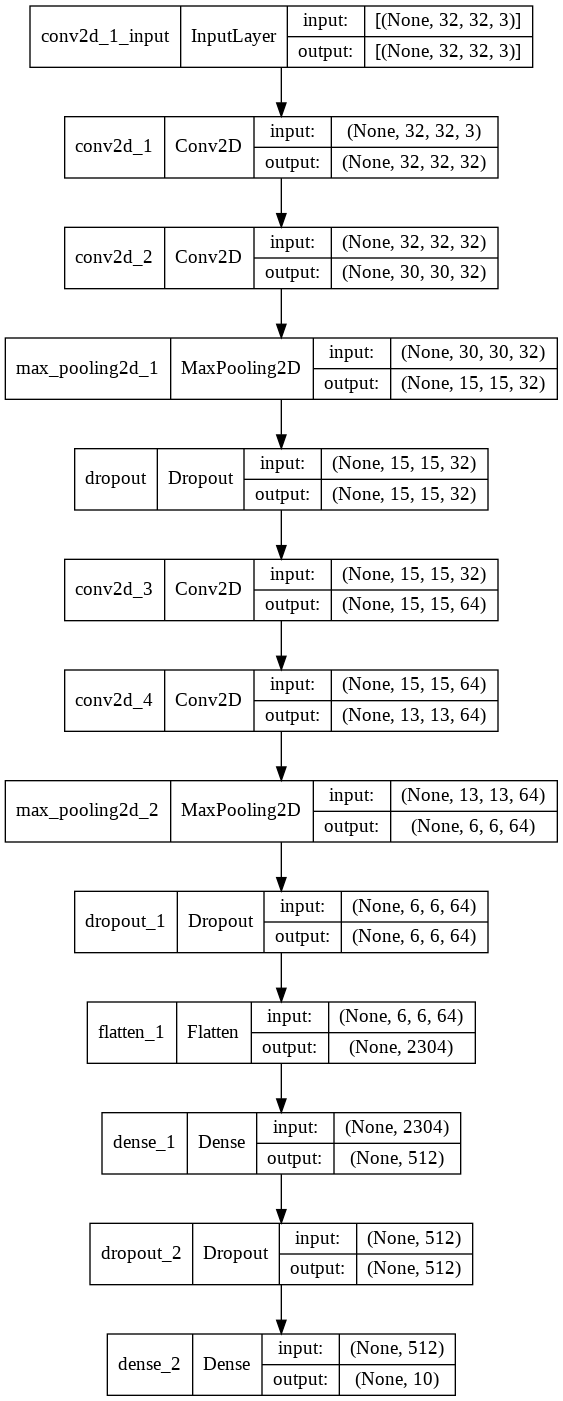

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
history2=model2.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=batch_size)

Epoch 1/10
1250/1250 [==============================] - 193s 154ms/step - loss: 2.1704 - accuracy: 0.2951 - val_loss: 1.5384 - val_accuracy: 0.4473
Epoch 2/10
1250/1250 [==============================] - 194s 155ms/step - loss: 1.5349 - accuracy: 0.4450 - val_loss: 1.3648 - val_accuracy: 0.5202
Epoch 3/10
1250/1250 [==============================] - 193s 154ms/step - loss: 1.4122 - accuracy: 0.4955 - val_loss: 1.2638 - val_accuracy: 0.5580
Epoch 4/10
1250/1250 [==============================] - 194s 155ms/step - loss: 1.3065 - accuracy: 0.5368 - val_loss: 1.1414 - val_accuracy: 0.6007
Epoch 5/10
1250/1250 [==============================] - 195s 156ms/step - loss: 1.2119 - accuracy: 0.5731 - val_loss: 1.0885 - val_accuracy: 0.6250
Epoch 6/10
1250/1250 [==============================] - 194s 155ms/step - loss: 1.1494 - accuracy: 0.5979 - val_loss: 1.0537 - val_accuracy: 0.6363
Epoch 7/10
1250/1250 [==============================] - 194s 155ms/step - loss: 1.1096 - accuracy: 0.6140 - val_

In [ ]:
#Save the trained model to a h5 format file in the local directory.
model2.save('model_cnn.h5', save_format='h5')

In [ ]:
#model2 = tf.keras.models.load_model("model_cnn.h5")

In [ ]:
#Save history file to an external file
np.save('history2.npy',history2.history)
#To load a history file
#history2=np.load('history2.npy',allow_pickle='TRUE').item()

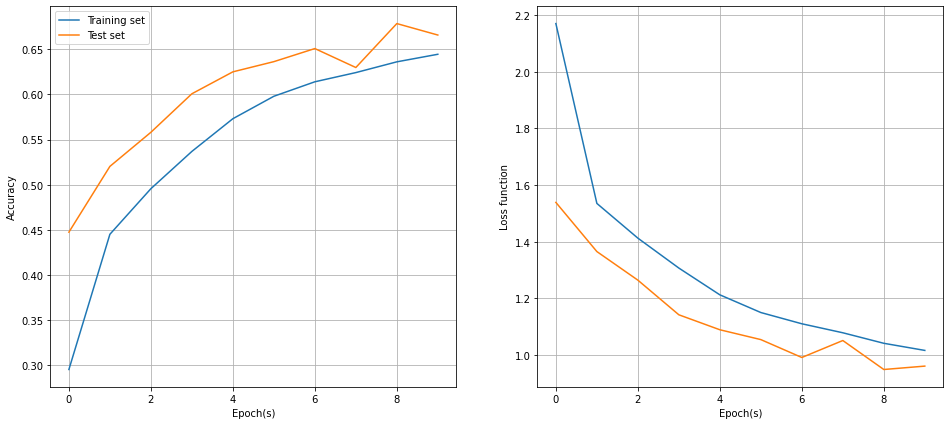

In [ ]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label = "Training set")
plt.plot(history2.history['val_accuracy'], label = "Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history2.history['loss'], label = "Training set")
plt.plot(history2.history['val_loss'], label = "Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

In [ ]:
results = model2.evaluate(x_test, y_test, batch_size = batch_size)
print("test loss, test acc:", results)

313/313 [==============================] - 11s 36ms/step - loss: 0.9805 - accuracy: 0.6586
test loss, test acc: [0.9804891347885132, 0.6585999727249146]


##Observations##

1. Model 2 performs way better than the first model. Test accuracy has improved by 100% from 33% to 66%.
2. The number of parameters for Model 2 is also much higher than that of of the first model. (In order of 500% increase)
3. Test accuracy of model 2 is better than its trainsing accuracy which suggests that there is no overfiting issue here.
4. More work is required to improve the classification accuracy either continue to improve on the CNN model architecture or to use existing model via transfer learning. 


In [ ]:
# put your codes here
model3 = Sequential()


model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3),padding='same'))
model3.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size =(2,2), strides=2))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model3.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size =(2,2), strides=2))
model3.add(Dropout(0.25))

# Flatten
model3.add(Flatten())

#output layer
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

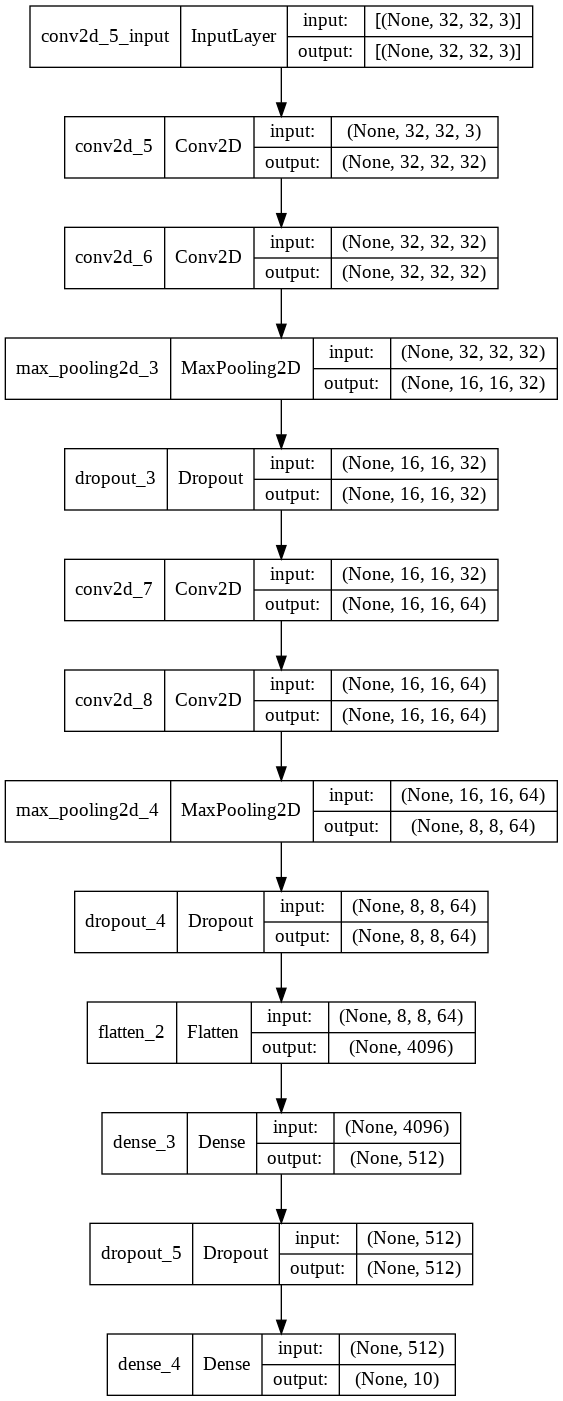

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True, show_layer_names=True)

In [ ]:
opt = Adam(learning_rate = 0.001)
model3.compile(optimizer = opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
# print out the model's summary 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [ ]:
history3=model3.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=batch_size)

Epoch 1/10
1250/1250 [==============================] - 240s 192ms/step - loss: 2.0521 - accuracy: 0.3489 - val_loss: 1.4969 - val_accuracy: 0.4603
Epoch 2/10
1250/1250 [==============================] - 237s 190ms/step - loss: 1.4166 - accuracy: 0.4913 - val_loss: 1.2606 - val_accuracy: 0.5510
Epoch 3/10
1250/1250 [==============================] - 238s 190ms/step - loss: 1.2762 - accuracy: 0.5451 - val_loss: 1.1755 - val_accuracy: 0.5885
Epoch 4/10
1250/1250 [==============================] - 239s 191ms/step - loss: 1.1934 - accuracy: 0.5814 - val_loss: 1.0806 - val_accuracy: 0.6269
Epoch 5/10
1250/1250 [==============================] - 239s 191ms/step - loss: 1.1265 - accuracy: 0.6045 - val_loss: 0.9811 - val_accuracy: 0.6614
Epoch 6/10
1250/1250 [==============================] - 240s 192ms/step - loss: 1.0702 - accuracy: 0.6257 - val_loss: 0.9550 - val_accuracy: 0.6630
Epoch 7/10
1250/1250 [==============================] - 241s 192ms/step - loss: 1.0283 - accuracy: 0.6395 - val_

In [ ]:
#Save history file to an external file
np.save('history3.npy',history3.history)
#To load a history file
#history2=np.load('history2.npy',allow_pickle='TRUE').item()

In [ ]:
model3.save('model3_cnn.h5', save_format='h5')

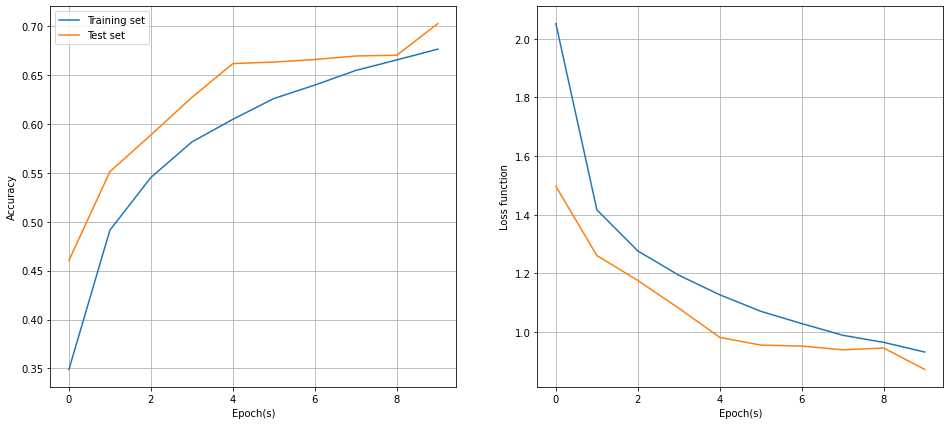

In [ ]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label = "Training set")
plt.plot(history3.history['val_accuracy'], label = "Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history3.history['loss'], label = "Training set")
plt.plot(history3.history['val_loss'], label = "Test set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

In [ ]:
results = model3.evaluate(x_test, y_test, batch_size = batch_size)
print("test loss, test acc:", results)

313/313 [==============================] - 14s 44ms/step - loss: 0.8831 - accuracy: 0.6899
test loss, test acc: [0.8831208944320679, 0.6898999810218811]
